# Supervised Learning Project

Objective is to predict the likelihood of a liability customer buying personal loans.

The dataset contains data on 5,000 customers including their demographic information, relationship with the bank, and  response to the last personal loan campaign.

#### Importing libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#### Reading dataset into dataframe, checking for datatypes, statistical summary, shape, and null values:

In [2]:
theradata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
theradata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
theradata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
theradata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
theradata.shape

(5000, 14)

In [7]:
theradata.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Exploratory Data Analysis:

In [8]:
unique = theradata.nunique()
print("Number of unique in each column?", '\n', unique) 

Number of unique in each column? 
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [9]:
ZeroMortgage = theradata[theradata['Mortgage'] == 0]
ZeroMortgageNum = len(ZeroMortgage)
print("Number of people with zero mortgage?", ZeroMortgageNum)

Number of people with zero mortgage? 3462


In [10]:
ZeroCCSpending = theradata[theradata['CCAvg'] == 0]
ZeroCCSpendingNum = len(ZeroCCSpending)
print("Number of people with zero credit card spending per month?", ZeroCCSpendingNum)

Number of people with zero credit card spending per month? 106


In [11]:
theradata['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [12]:
theradata['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [13]:
theradata['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [14]:
theradata['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [15]:
theradata['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [16]:
theradata['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [17]:
theradata['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [18]:
theradata['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

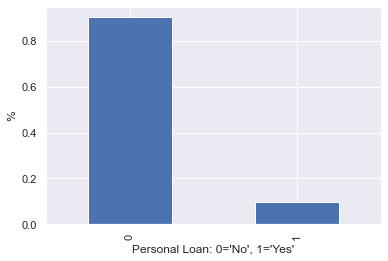

In [19]:
theradata['Personal Loan'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Personal Loan: 0='No', 1='Yes'")
plt.ylabel("%")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

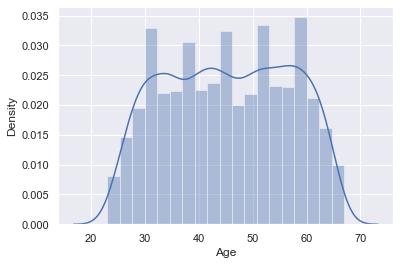

In [20]:
sns.distplot(theradata['Age'])

<AxesSubplot:xlabel='Experience', ylabel='Density'>

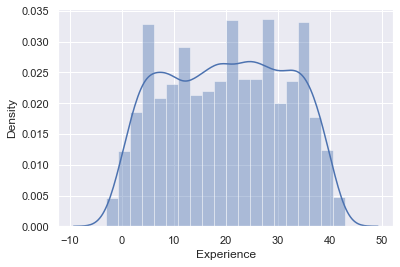

In [21]:
sns.distplot(theradata['Experience'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

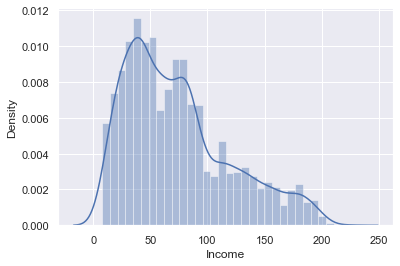

In [22]:
sns.distplot(theradata['Income'])

<AxesSubplot:xlabel='Family', ylabel='count'>

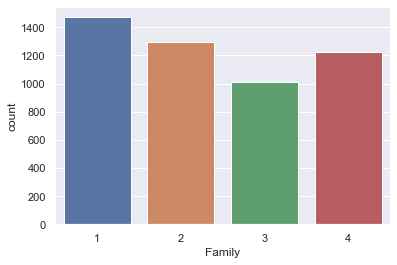

In [23]:
sns.countplot(theradata['Family'])

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

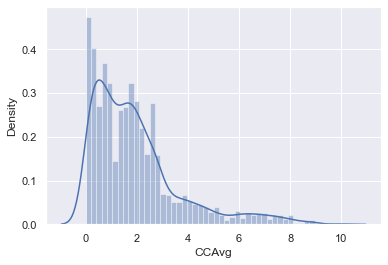

In [24]:
sns.distplot(theradata['CCAvg'])

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

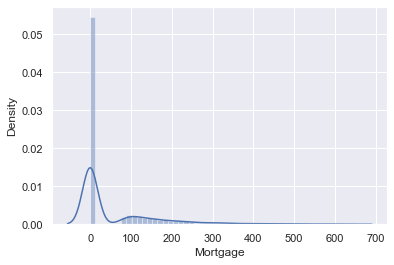

In [25]:
sns.distplot(theradata['Mortgage'])

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

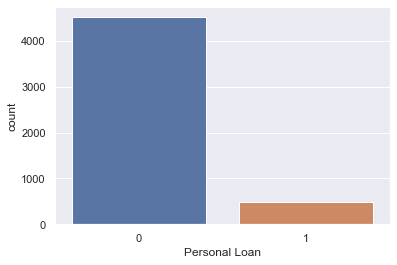

In [26]:
sns.countplot(theradata['Personal Loan'])

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

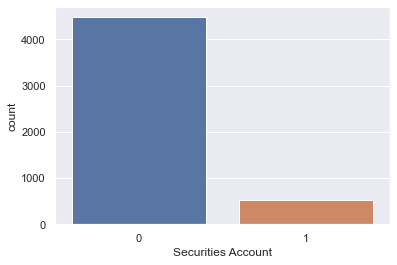

In [27]:
sns.countplot(theradata['Securities Account'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

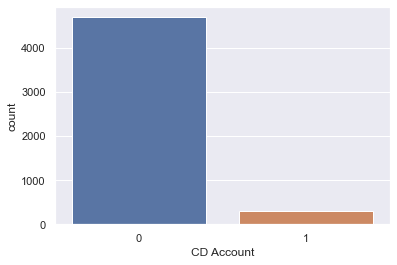

In [28]:
sns.countplot(theradata['CD Account'])

<AxesSubplot:xlabel='Online', ylabel='count'>

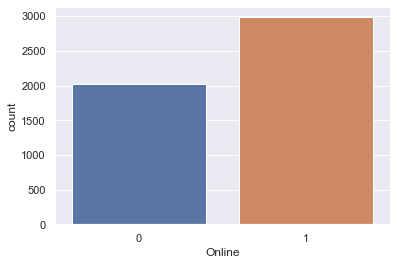

In [29]:
sns.countplot(theradata['Online'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

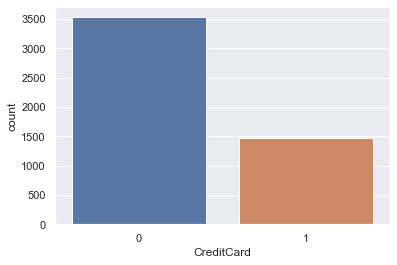

In [30]:
sns.countplot(theradata['CreditCard'])

#### Splitting data into training and test set by 70:30:

In [31]:
X = theradata.drop('Personal Loan',axis=1)  
Y = theradata['Personal Loan']   
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()
print("{0:0.2f}% data is in training set".format((len(x_train)/len(theradata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(theradata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Using Logistic Regression model to predict whether the customer will take a personal loan or not:

In [32]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.908


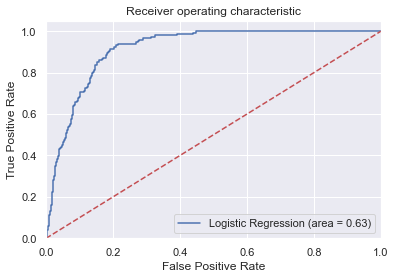

In [33]:
model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
print('\n{}'.format(classification_report(y_test, model.predict(x_test))))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



<AxesSubplot:>

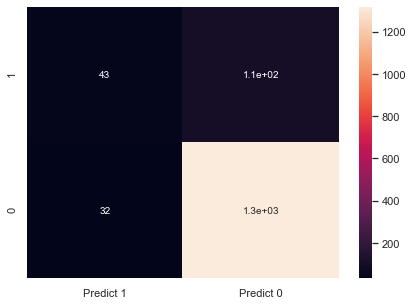

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Looking at coefficients of the attributes and displaying the output:

In [36]:
log_odds = model.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Income,0.036103
Education,0.009346
Family,0.008596
CCAvg,0.005785
CD Account,0.002693
Mortgage,0.000860
Securities Account,0.000303
CreditCard,-0.000031
ID,-0.000036
ZIP Code,-0.000065


#### Displaying all the rows in test data where the predicted class is not equal to the observed class:

In [37]:
r = x_test
r['Observed Loan Status'] = y_test
r['Predicted Loan Status'] = y_predict
r[r['Observed Loan Status']!= r['Predicted Loan Status']]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
1513,1514,45,21,183,95211,2,1.4,1,354,0,0,0,0,0,1
4377,4378,33,8,145,92507,1,2.7,3,0,0,0,1,0,1,0
3988,3989,59,35,85,91330,1,3.4,3,0,0,1,0,1,1,0
3271,3272,52,27,93,90291,4,4.1,2,0,0,0,0,1,1,0
349,350,26,2,60,93407,2,3.0,1,132,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,4564,28,2,188,92350,2,4.5,1,0,1,0,1,0,0,1
351,352,28,4,155,92182,4,5.3,2,0,0,0,1,0,1,0
421,422,28,3,115,92333,4,3.1,2,0,0,0,0,0,1,0
4008,4009,61,31,154,94555,3,7.5,3,351,0,1,1,1,1,0
